<a href="https://colab.research.google.com/github/mtsokanlawon/data-analysis-projects/blob/main/Academic_and_Engagement_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Academic and Engagement Performance Analysis

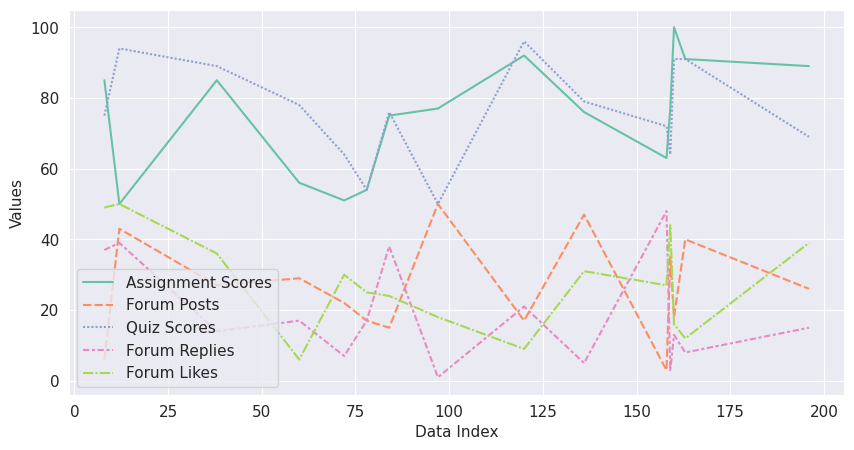

## 1: Get and Import datasets:

##### First, let's import the tools for our use:
- pandas:
- numpy:

In [ ]:
import csv

In [ ]:
!pip install pandas --quiet

import pandas as pd

In [ ]:
!pip install numpy --quiet

import numpy as np

##### Now, we load the datasets into pandas DataFrame using `pd.read_csv()` and providing the link to the dataset as an argument.

In [ ]:
activities_link = "/content/drive/MyDrive/academic and engagement activities_dataset/academic and engagement activities.csv"

activities_df = pd.read_csv(activities_link)

In [ ]:
courses_link = "/content/drive/MyDrive/academic and engagement activities_dataset/courses.csv"

courses_df = pd.read_csv(courses_link)

In [ ]:
activities_df

,Student ID,Course ID,Course Name,Course Start Date,Course End Date,Student Name,Enrollment Date,Course Completion Status,Assignment Scores,Quiz Scores,Forum Posts,Forum Replies,Forum Likes,Time Spent on Course Materials (hours)
0,1,2,Switchable eco-centric archive,2023-07-22,2023-12-12,Michelle Chase,2022-10-14,Completed,71,76,25,39,24,36.33
1,2,1,Organized contextually-based alliance,2023-07-12,2023-05-18,Adrian Sanders,2022-10-16,Completed,99,90,45,14,12,33.30
2,3,5,Persevering demand-driven secured line,2023-04-11,2023-04-24,Mr. Benjamin Newman,2022-10-15,Completed,58,86,12,49,38,42.08
3,4,4,Cross-platform scalable definition,2022-12-11,2024-01-12,Lisa Stanton,2022-10-11,Completed,90,62,4,33,32,31.78
4,5,4,Mandatory reciprocal structure,2023-07-02,2023-12-29,Jeffrey Joyce,2022-10-16,Completed,66,95,37,24,47,45.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,9,Optional explicit infrastructure,2023-01-05,2023-10-22,Kenneth Garrett,2022-10-14,Completed,80,51,48,30,12,6.30
196,197,4,User-friendly even-keeled policy,2022-12-06,2023-08-13,Christina Conner,2022-10-15,In Progress,89,69,26,15,39,42.42
197,198,10,Mandatory actuating website,2022-11-15,2023-09-13,Jason Lucas,2022-10-13,In Progress,99,86,38,29,16,19.01
198,199,4,User-centric human-resource productivity,2023-04-15,2023-10-21,Charlene Diaz,2022-10-15,Completed,54,93,38,35,43,38.37


This is what we can tell by looking at this data:
- We're provided with a dataset of 200 records, each record identifies a fictitious student.
- Informations provided include, Id of student, Id of Courses offered by student, start date an end date for each course offered, the course name, course completion status.
- we should also note that an enrollment date is provided, which means enrollment was probably required before course starts.
- Also, we have metrics on the course work performance of students as well as their performance on forums, most likely a discussion forum for assignments and topics of interest in relation to the courses offered by the students.
- We also have a metric of how much time each student has spent on the course material.

In [ ]:
courses_df

,Course ID,Course Title
0,1,Strategic Business Solutions
1,2,Advanced Technology Integration
2,3,Innovative Information Management
3,4,Efficient Data and Systems Optimization
4,5,Cutting-Edge Software Development
5,6,Modern IT Infrastructure Design
6,7,Enterprise Resource Management
7,8,Digital Transformation Strategies
8,9,Effective IT Governance
9,10,Cybersecurity and Network Management


Here we are provided with:
- `Course Title` and corresponding `Course ID`
- Looking at this, the `Course ID` column in `courses_df` seems to have the same range as `Course ID` column from `activities_df`. It's important to note this because it will help in merging the two data frames for further analysis.
- Also, it seems that each course title from `courses_df` is a parent to a number of course names in `activities_df` with corresponding `course_id`. Which helps us merge both datasets on this feature( `course_id`).

##2: Prepare and Clean Dataset

In [ ]:
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Student ID                              200 non-null    int64  
 1   Course ID                               200 non-null    int64  
 2   Course Name                             200 non-null    object 
 3   Course Start Date                       200 non-null    object 
 4   Course End Date                         200 non-null    object 
 5   Student Name                            200 non-null    object 
 6   Enrollment Date                         200 non-null    object 
 7   Course Completion Status                200 non-null    object 
 8   Assignment Scores                       200 non-null    int64  
 9   Quiz Scores                             200 non-null    int64  
 10  Forum Posts                             200 non-null    int64 

The columns all seem to have the right data types. We might want to change the dates' columns into `Datetime` data type.

In [ ]:
activities_df["Course Start Date"] = pd.to_datetime(activities_df["Course Start Date"])

activities_df["Course End Date"] = pd.to_datetime(activities_df["Course End Date"])

activities_df["Enrollment Date"] = pd.to_datetime(activities_df["Enrollment Date"])

In [ ]:
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Student ID                              200 non-null    int64         
 1   Course ID                               200 non-null    int64         
 2   Course Name                             200 non-null    object        
 3   Course Start Date                       200 non-null    datetime64[ns]
 4   Course End Date                         200 non-null    datetime64[ns]
 5   Student Name                            200 non-null    object        
 6   Enrollment Date                         200 non-null    datetime64[ns]
 7   Course Completion Status                200 non-null    object        
 8   Assignment Scores                       200 non-null    int64         
 9   Quiz Scores                             200 non-null  

We should have an overview of our numerical columns using the `.describe()` method on the dataframe of interest, we could spot outliers if there are any.

In [ ]:
activities_df.describe()

,Student ID,Course ID,Assignment Scores,Quiz Scores,Forum Posts,Forum Replies,Forum Likes,Time Spent on Course Materials (hours)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,5.375000,75.660000,75.900000,25.920000,25.325000,26.490000,25.726500
std,57.879185,2.869765,14.889354,14.618086,14.296347,14.333058,14.420808,14.484156
min,1.000000,1.000000,50.000000,50.000000,0.000000,0.000000,0.000000,1.140000
25%,50.750000,3.000000,63.000000,64.000000,15.000000,14.000000,15.000000,12.147500
50%,100.500000,5.000000,75.000000,76.000000,27.000000,27.000000,26.500000,26.665000
75%,150.250000,8.000000,89.000000,88.000000,38.000000,37.250000,39.000000,37.912500
max,200.000000,10.000000,100.000000,99.000000,50.000000,50.000000,50.000000,49.740000


In [ ]:

# mean of integers from 1 to 200.
l = (range(1,201))
print(np.average(l))

100.5


There seems to be no outliers from our numerical values and the `.describe()` method performed earlier shows all columns to have 200 non-null counts, which implies that we do not have empty data spaces.

In [ ]:
courses_df

,Course ID,Course Title
0,1,Strategic Business Solutions
1,2,Advanced Technology Integration
2,3,Innovative Information Management
3,4,Efficient Data and Systems Optimization
4,5,Cutting-Edge Software Development
5,6,Modern IT Infrastructure Design
6,7,Enterprise Resource Management
7,8,Digital Transformation Strategies
8,9,Effective IT Governance
9,10,Cybersecurity and Network Management


In [ ]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course ID     10 non-null     int64 
 1   Course Title  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


√ Now let's create a new dataframe by merging the datasets and adding new columns that might aid our analysis.

We'll use the `.merge()` method of pandas. Passing `Course ID` as the `on` argument. Our new df is titled `performance_df`.

In [ ]:
# creating and merging dataframes.

performance_df = activities_df.merge(courses_df, on = "Course ID")

In [ ]:
performance_df

,Student ID,Course ID,Course Name,Course Start Date,Course End Date,Student Name,Enrollment Date,Course Completion Status,Assignment Scores,Quiz Scores,Forum Posts,Forum Replies,Forum Likes,Time Spent on Course Materials (hours),Course Title
0,1,2,Switchable eco-centric archive,2023-07-22,2023-12-12,Michelle Chase,2022-10-14,Completed,71,76,25,39,24,36.33,Advanced Technology Integration
1,7,2,Front-line tangible website,2023-05-08,2023-09-21,Jessica Waters,2022-10-15,Completed,97,74,40,28,4,16.14,Advanced Technology Integration
2,9,2,Cloned modular function,2023-09-05,2023-07-21,Justin Rogers,2022-10-13,Completed,85,75,6,37,49,29.40,Advanced Technology Integration
3,14,2,Managed real-time superstructure,2023-06-18,2023-07-06,Jeffery Freeman,2022-10-17,In Progress,57,50,38,3,32,9.61,Advanced Technology Integration
4,36,2,Networked optimizing neural-net,2023-08-18,2023-06-11,Joseph Brown,2022-10-16,Completed,56,70,29,30,12,18.92,Advanced Technology Integration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,150,6,Vision-oriented client-server frame,2023-08-13,2023-09-09,Melissa Duncan,2022-10-13,Completed,61,98,23,3,43,16.93,Modern IT Infrastructure Design
196,156,6,User-friendly local help-desk,2023-03-30,2023-08-17,Nicholas Fuller,2022-10-12,Completed,50,97,8,31,37,35.39,Modern IT Infrastructure Design
197,160,6,Persistent attitude-oriented groupware,2022-12-26,2023-06-26,Susan Harrison,2022-10-12,Completed,77,64,35,3,44,36.32,Modern IT Infrastructure Design
198,185,6,Innovative homogeneous application,2023-07-03,2023-10-04,Bailey Fowler,2022-10-17,Completed,55,60,40,7,3,33.60,Modern IT Infrastructure Design


The dataset seems to have been reordered by the `.merge()` method, we can reorder it.

In [ ]:
performance_df = performance_df.copy().sort_values("Student ID").reset_index().drop(columns = "index")

In [ ]:
performance_df

,Student ID,Course ID,Course Name,Course Start Date,Course End Date,Student Name,Enrollment Date,Course Completion Status,Assignment Scores,Quiz Scores,Forum Posts,Forum Replies,Forum Likes,Time Spent on Course Materials (hours),Course Title
0,1,2,Switchable eco-centric archive,2023-07-22,2023-12-12,Michelle Chase,2022-10-14,Completed,71,76,25,39,24,36.33,Advanced Technology Integration
1,2,1,Organized contextually-based alliance,2023-07-12,2023-05-18,Adrian Sanders,2022-10-16,Completed,99,90,45,14,12,33.30,Strategic Business Solutions
2,3,5,Persevering demand-driven secured line,2023-04-11,2023-04-24,Mr. Benjamin Newman,2022-10-15,Completed,58,86,12,49,38,42.08,Cutting-Edge Software Development
3,4,4,Cross-platform scalable definition,2022-12-11,2024-01-12,Lisa Stanton,2022-10-11,Completed,90,62,4,33,32,31.78,Efficient Data and Systems Optimization
4,5,4,Mandatory reciprocal structure,2023-07-02,2023-12-29,Jeffrey Joyce,2022-10-16,Completed,66,95,37,24,47,45.27,Efficient Data and Systems Optimization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,9,Optional explicit infrastructure,2023-01-05,2023-10-22,Kenneth Garrett,2022-10-14,Completed,80,51,48,30,12,6.30,Effective IT Governance
196,197,4,User-friendly even-keeled policy,2022-12-06,2023-08-13,Christina Conner,2022-10-15,In Progress,89,69,26,15,39,42.42,Efficient Data and Systems Optimization
197,198,10,Mandatory actuating website,2022-11-15,2023-09-13,Jason Lucas,2022-10-13,In Progress,99,86,38,29,16,19.01,Cybersecurity and Network Management
198,199,4,User-centric human-resource productivity,2023-04-15,2023-10-21,Charlene Diaz,2022-10-15,Completed,54,93,38,35,43,38.37,Efficient Data and Systems Optimization


Let's add few other columns.
We can add categorical columns based on the scores for easier analysis.

let's have scores `0-39` as `Fail`, `40-49` as `Poor`, `50-59` as `Pass` , `60-75` as `Good`, `76-89` as `Great` and `90-99` as `Excellent` and `100`as `Outstanding`. Making it 7 grades.

for forum performances let's have: `0-20` as `Poor`, `21-39` as `Good`and `40-50`as `Excellent`.

In [ ]:
performance_df["Time Spent on Course Materials (hours)"].describe()

count    200.000000
mean      25.726500
std       14.484156
min        1.140000
25%       12.147500
50%       26.665000
75%       37.912500
max       49.740000
Name: Time Spent on Course Materials (hours), dtype: float64

In [ ]:
# Assignment Scores Grade Column
performance_df["AssGrade"] = pd.cut(performance_df["Assignment Scores"],
                               bins = [-1, 40, 50, 60, 76, 90, 99, float('inf')],
                               labels = ["Fail", "Poor", "Pass", "Good", "Great", "Excellent","Outstanding"])

# Quiz Scores Grade column
performance_df["QuizGrade"] = pd.cut(performance_df["Quiz Scores"],
                               bins = [-1, 40, 50, 60, 76, 90, 99, float('inf')],
                               labels = ["Fail", "Poor", "Pass", "Good", "Great", "Excellent","Outstanding"])

# Forum Posts Grade
performance_df["FPostsGrade"] = pd.cut(performance_df["Forum Posts"],
                              bins = [-1, 21, 40, float('inf')],
                              labels = ["Poor", "Good", "Excellent"])

# Forum Replies Grade
performance_df["FRepGrade"] = pd.cut(performance_df["Forum Replies"],
                              bins = [-1, 21, 40, float('inf')],
                              labels = ["Poor", "Good", "Excellent"])

# Forum Likes Grade
performance_df["FLikesGrade"] = pd.cut(performance_df["Forum Likes"],
                              bins = [-1, 21, 40, float('inf')],
                              labels = ["Poor", "Good", "Excellent"])

# Time Spent on Material Rating
performance_df["TimeOnMaterial"] = pd.cut(performance_df["Time Spent on Course Materials (hours)"],
                              bins = [-1, 10, 21, 40, float('inf')],
                              labels = ["Very Low", "Low", "High", "Very High"])



performance_df.sample(15)

,Student ID,Course ID,Course Name,Course Start Date,Course End Date,Student Name,Enrollment Date,Course Completion Status,Assignment Scores,Quiz Scores,...,Forum Replies,Forum Likes,Time Spent on Course Materials (hours),Course Title,AssGrade,QuizGrade,FPostsGrade,FRepGrade,FLikesGrade,TimeOnMaterial
27,28,1,Streamlined homogeneous policy,2022-10-25,2023-11-08,Larry Molina,2022-10-17,Completed,73,57,...,35,22,48.18,Strategic Business Solutions,Good,Pass,Poor,Good,Good,Very High
199,200,1,Quality-focused zero tolerance archive,2023-08-29,2023-05-21,Carolyn Anderson,2022-10-11,Completed,79,74,...,9,48,29.13,Strategic Business Solutions,Great,Good,Excellent,Poor,Excellent,High
173,174,9,Secured discrete artificial intelligence,2023-06-17,2023-07-20,Allison Gomez,2022-10-16,Completed,100,58,...,45,44,41.76,Effective IT Governance,Outstanding,Pass,Poor,Excellent,Excellent,Very High
14,15,4,Multi-channeled demand-driven strategy,2023-02-05,2023-12-21,Jodi Goodman,2022-10-13,Completed,54,98,...,39,17,7.48,Efficient Data and Systems Optimization,Pass,Excellent,Poor,Good,Poor,Very Low
166,167,2,Upgradable radical process improvement,2023-09-13,2023-01-01,Emily Hudson,2022-10-16,Completed,78,51,...,44,6,5.66,Advanced Technology Integration,Great,Pass,Poor,Excellent,Poor,Very Low
187,188,8,Fundamental attitude-oriented moderator,2023-01-15,2023-10-12,Vickie Guerra,2022-10-16,Completed,93,97,...,31,31,36.33,Digital Transformation Strategies,Excellent,Excellent,Poor,Good,Good,High
81,82,4,Front-line eco-centric algorithm,2023-06-14,2023-06-09,Brent Brown,2022-10-13,Completed,72,71,...,31,21,5.87,Efficient Data and Systems Optimization,Good,Good,Good,Good,Poor,Very Low
165,166,2,Reactive secondary framework,2023-02-19,2023-08-24,Katrina Mcdonald,2022-10-11,Completed,79,98,...,28,30,21.38,Advanced Technology Integration,Great,Excellent,Good,Good,Good,High
116,117,3,Secured value-added groupware,2023-09-21,2023-12-05,William Maldonado,2022-10-14,Completed,93,71,...,5,18,39.71,Innovative Information Management,Excellent,Good,Poor,Poor,Poor,High
127,128,9,Automated disintermediate throughput,2023-09-20,2023-10-30,Randy Reyes,2022-10-16,In Progress,89,75,...,44,11,6.34,Effective IT Governance,Great,Good,Poor,Excellent,Poor,Very Low


## 3: Perform Exploratory Analysis and Visualization

Let's begin by importing matplotlib.pyplot and seaborn.

In [ ]:
!pip install seaborn --quiet
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

We can now explore the dataset by querying the rows and columns.

Let's take a full view at our dataset.

In [ ]:
# from IPython.display import display
# with pd.option_context("display.max_rows", 300):
#    display(performance_df)

In [ ]:
performance_df[performance_df["Time Spent on Course Materials (hours)"] > 41]

,Student ID,Course ID,Course Name,Course Start Date,Course End Date,Student Name,Enrollment Date,Course Completion Status,Assignment Scores,Quiz Scores,...,Forum Replies,Forum Likes,Time Spent on Course Materials (hours),Course Title,AssGrade,QuizGrade,FPostsGrade,FRepGrade,FLikesGrade,TimeOnMaterial
2,3,5,Persevering demand-driven secured line,2023-04-11,2023-04-24,Mr. Benjamin Newman,2022-10-15,Completed,58,86,...,49,38,42.08,Cutting-Edge Software Development,Pass,Great,Poor,Excellent,Good,Very High
4,5,4,Mandatory reciprocal structure,2023-07-02,2023-12-29,Jeffrey Joyce,2022-10-16,Completed,66,95,...,24,47,45.27,Efficient Data and Systems Optimization,Good,Excellent,Good,Good,Excellent,Very High
16,17,9,Robust grid-enabled database,2023-01-16,2023-12-14,Shawn Brown,2022-10-12,Completed,59,56,...,6,18,48.60,Effective IT Governance,Pass,Pass,Good,Poor,Poor,Very High
18,19,1,Adaptive empowering open system,2023-09-21,2024-01-09,Kayla Diaz,2022-10-15,Completed,52,77,...,13,19,45.76,Strategic Business Solutions,Pass,Great,Poor,Poor,Poor,Very High
19,20,9,Re-engineered stable initiative,2022-12-13,2023-12-05,Joseph Martin,2022-10-15,Completed,73,64,...,40,37,41.69,Effective IT Governance,Good,Good,Good,Good,Good,Very High
21,22,9,Multi-channeled optimal intranet,2023-02-23,2022-12-06,Heather Tyler,2022-10-16,Completed,85,94,...,16,42,41.41,Effective IT Governance,Great,Excellent,Good,Poor,Excellent,Very High
27,28,1,Streamlined homogeneous policy,2022-10-25,2023-11-08,Larry Molina,2022-10-17,Completed,73,57,...,35,22,48.18,Strategic Business Solutions,Good,Pass,Poor,Good,Good,Very High
29,30,7,Streamlined multi-state leverage,2023-07-30,2024-01-13,Ann Payne,2022-10-12,In Progress,52,58,...,10,35,48.36,Enterprise Resource Management,Pass,Pass,Good,Poor,Good,Very High
30,31,6,Organic intermediate hierarchy,2023-07-09,2023-07-29,Jackie Schroeder,2022-10-16,In Progress,72,79,...,0,48,43.15,Modern IT Infrastructure Design,Good,Great,Good,Poor,Excellent,Very High
32,33,3,Customer-focused 6thgeneration flexibility,2022-10-30,2023-10-01,Abigail Santiago,2022-10-12,In Progress,93,83,...,28,24,49.02,Innovative Information Management,Excellent,Great,Good,Good,Good,Very High


In [ ]:
performance_df.columns

Index(['Student ID', 'Course ID', 'Course Name', 'Course Start Date',
       'Course End Date', 'Student Name', 'Enrollment Date',
       'Course Completion Status', 'Assignment Scores', 'Quiz Scores',
       'Forum Posts', 'Forum Replies', 'Forum Likes',
       'Time Spent on Course Materials (hours)', 'Course Title', 'AssGrade',
       'QuizGrade', 'FPostsGrade', 'FRepGrade', 'FLikesGrade',
       'TimeOnMaterial'],
      dtype='object')

### **Course Completion Status**

We have the range of columns in our dataset above.

Let's look at the categories of course completion status and its distribution.

In [ ]:
completion_status_count = performance_df["Course Completion Status"].value_counts()
completion_status_count

Completed      141
In Progress     59
Name: Course Completion Status, dtype: int64

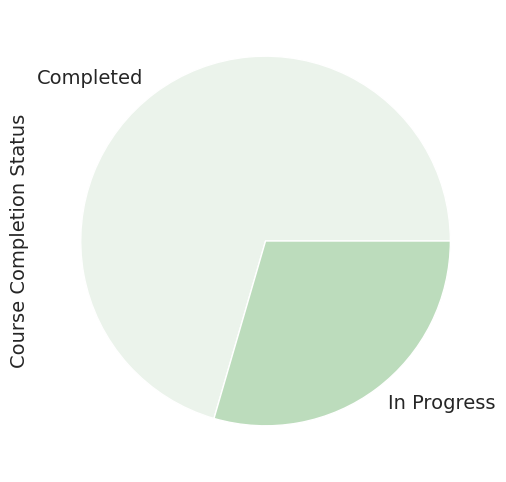

In [ ]:

color_palette = sns.light_palette("Green")

completion_status_count.plot.pie(figsize= (6,6), colors = color_palette);

### **Courses**

Let's look at courses with higher enrollments.

In [ ]:
top_course_titles = performance_df["Course Title"].value_counts(ascending = False)
top_course_titles

Efficient Data and Systems Optimization    27
Advanced Technology Integration            26
Effective IT Governance                    25
Cutting-Edge Software Development          20
Innovative Information Management          18
Cybersecurity and Network Management       18
Modern IT Infrastructure Design            18
Strategic Business Solutions               17
Enterprise Resource Management             17
Digital Transformation Strategies          14
Name: Course Title, dtype: int64

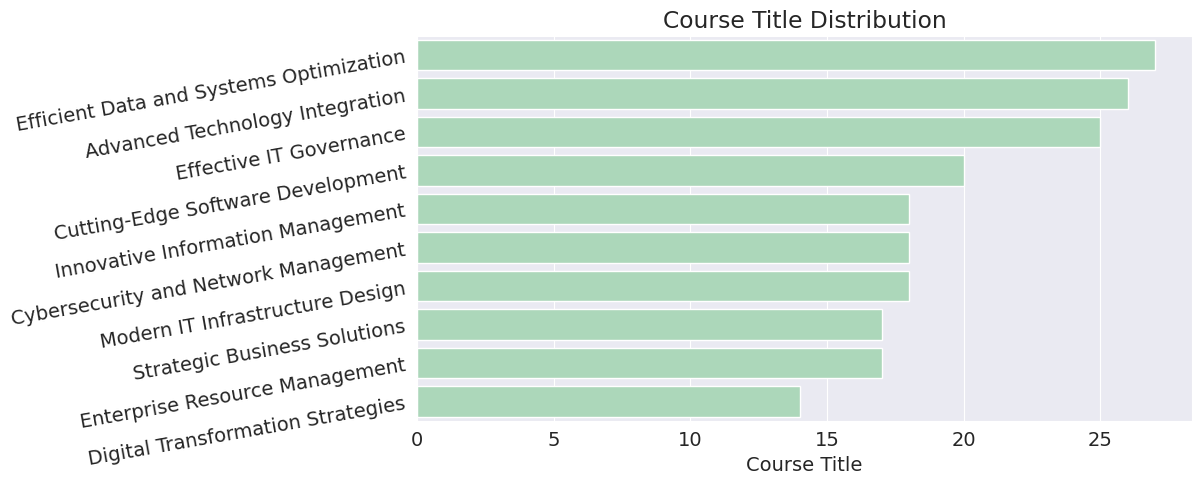

In [ ]:
plt.figure(figsize = (10,5))
plt.yticks(rotation = 10)
plt.title("Course Title Distribution")
sns.barplot(x = top_course_titles, y = top_course_titles.index, color = ((0.647, 0.871, 0.722, 0.89)));

Let's look through the course names.

In [ ]:
high_course_names = performance_df["Course Name"].value_counts(ascending = False)
high_course_names.max()

1

course names are offered, 1 by each student.

Let's look at the assignment scores distribution in relation to each course.

In [ ]:
performance_df

,Student ID,Course ID,Course Name,Course Start Date,Course End Date,Student Name,Enrollment Date,Course Completion Status,Assignment Scores,Quiz Scores,...,Forum Replies,Forum Likes,Time Spent on Course Materials (hours),Course Title,AssGrade,QuizGrade,FPostsGrade,FRepGrade,FLikesGrade,TimeOnMaterial
0,1,2,Switchable eco-centric archive,2023-07-22,2023-12-12,Michelle Chase,2022-10-14,Completed,71,76,...,39,24,36.33,Advanced Technology Integration,Good,Good,Good,Good,Good,High
1,2,1,Organized contextually-based alliance,2023-07-12,2023-05-18,Adrian Sanders,2022-10-16,Completed,99,90,...,14,12,33.30,Strategic Business Solutions,Excellent,Great,Excellent,Poor,Poor,High
2,3,5,Persevering demand-driven secured line,2023-04-11,2023-04-24,Mr. Benjamin Newman,2022-10-15,Completed,58,86,...,49,38,42.08,Cutting-Edge Software Development,Pass,Great,Poor,Excellent,Good,Very High
3,4,4,Cross-platform scalable definition,2022-12-11,2024-01-12,Lisa Stanton,2022-10-11,Completed,90,62,...,33,32,31.78,Efficient Data and Systems Optimization,Great,Good,Poor,Good,Good,High
4,5,4,Mandatory reciprocal structure,2023-07-02,2023-12-29,Jeffrey Joyce,2022-10-16,Completed,66,95,...,24,47,45.27,Efficient Data and Systems Optimization,Good,Excellent,Good,Good,Excellent,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,9,Optional explicit infrastructure,2023-01-05,2023-10-22,Kenneth Garrett,2022-10-14,Completed,80,51,...,30,12,6.30,Effective IT Governance,Great,Pass,Excellent,Good,Poor,Very Low
196,197,4,User-friendly even-keeled policy,2022-12-06,2023-08-13,Christina Conner,2022-10-15,In Progress,89,69,...,15,39,42.42,Efficient Data and Systems Optimization,Great,Good,Good,Poor,Good,Very High
197,198,10,Mandatory actuating website,2022-11-15,2023-09-13,Jason Lucas,2022-10-13,In Progress,99,86,...,29,16,19.01,Cybersecurity and Network Management,Excellent,Great,Good,Good,Poor,Low
198,199,4,User-centric human-resource productivity,2023-04-15,2023-10-21,Charlene Diaz,2022-10-15,Completed,54,93,...,35,43,38.37,Efficient Data and Systems Optimization,Pass,Excellent,Good,Good,Excellent,High


In [ ]:
performance_mean = performance_df.groupby("Course Title")[["Assignment Scores", "Quiz Scores",
                                                          "Forum Posts", "Forum Replies", "Forum Likes"
                                                           ]].mean().round(2)
performance_mean

,Assignment Scores,Quiz Scores,Forum Posts,Forum Replies,Forum Likes
Course Title,,,,,
Advanced Technology Integration,73.73,76.35,27.04,27.12,22.88
Cutting-Edge Software Development,76.45,74.35,25.50,24.60,31.40
Cybersecurity and Network Management,78.33,80.39,32.17,24.11,27.56
Digital Transformation Strategies,73.43,73.79,24.29,25.29,26.79
Effective IT Governance,77.08,74.24,23.20,26.52,24.68
Efficient Data and Systems Optimization,76.96,79.74,25.41,24.30,25.63
Enterprise Resource Management,69.24,74.47,27.35,24.35,28.88
Innovative Information Management,84.17,75.67,25.00,23.78,28.39
Modern IT Infrastructure Design,71.94,74.33,26.28,27.11,27.06




Now we can use heatmap to see the hidden information at a glance. We'll look at ;
> academic performance across `Course Title`

> Forum Engagement across `Course title`.
>

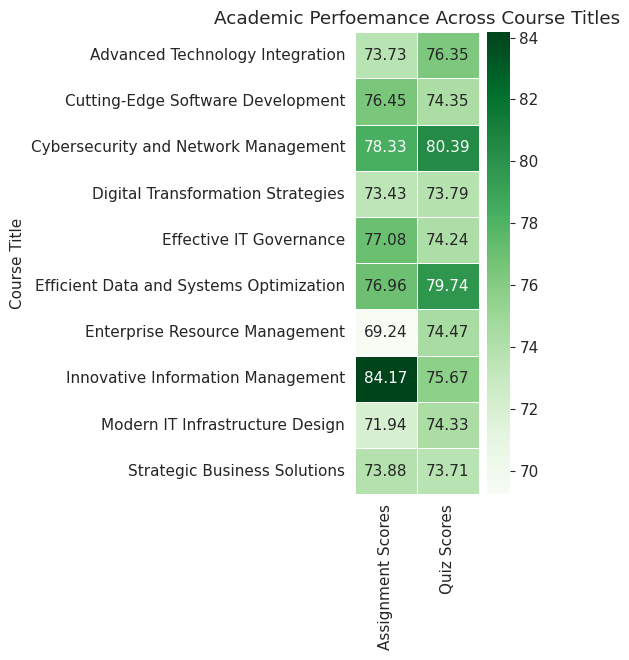

In [ ]:
matplotlib.rcParams["font.size"] = 11
plt.figure(figsize = (2,6))
plt.title("Academic Perfoemance Across Course Titles")
sns.heatmap(performance_mean[["Assignment Scores", "Quiz Scores"]], fmt = "", annot = True, cmap = "Greens", linewidths = .5);

So, the highest average assignment score goes to `Innovative Information Management` and lowest average of assignment scores is traced to `Enterprise Resource Management`.

Let's compare with Forum Participations:

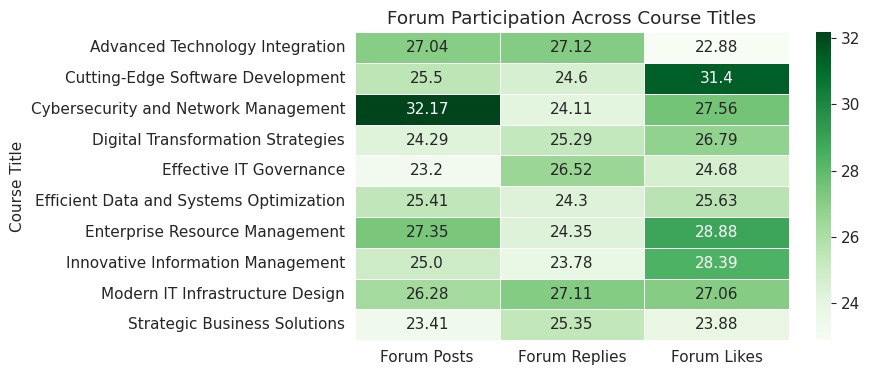

In [ ]:
matplotlib.rcParams["font.size"] = 11
plt.figure(figsize = (7,4))
plt.title("Forum Participation Across Course Titles")
sns.heatmap(performance_mean[["Forum Posts", "Forum Replies", "Forum Likes"]], fmt = "", annot = True, cmap = "Greens", linewidths = .5);

What comes to mind is the fact that the course title `Cybersecurity and Network Management` has the highest Average `Forum Posts`, it seems to also have the highest average quiz score. So there might be an interesting relationship between Forum Participation (In this case, `Forum Posts`) and Academic Performance to an extent.

### **Questions**

Let's look at the questions one after the other.

**Question 1: Do students who spend more time on the course materials achieve better grades?**

To answer this question, we have tried to categorize the `Time Spent On Course Material` duration into `Very High`, `High`, `Low`, and `Very Low`.

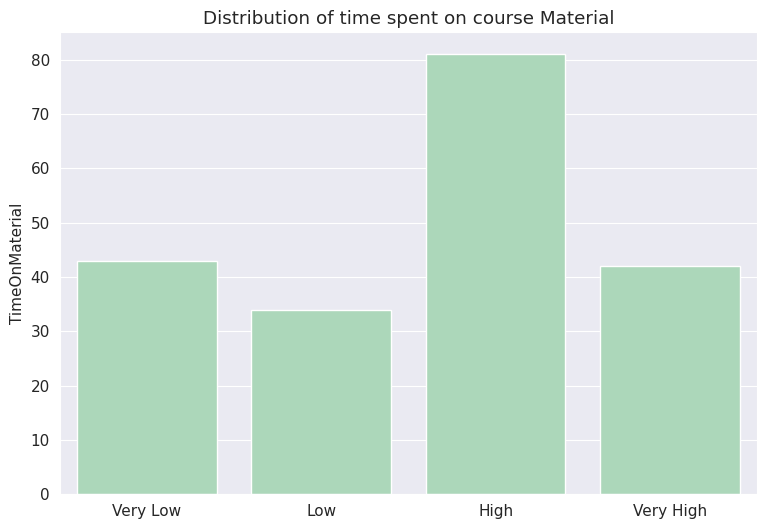

In [ ]:

plt.figure(figsize = (9,6))

time_spent = performance_df.TimeOnMaterial.value_counts(ascending = False)


sns.barplot(x = time_spent.index,
              y = time_spent,
            color = (0.647, 0.871, 0.722, 0.89),
              )
plt.title("Distribution of time spent on course Material");

Here we can see that most students spent high amount of time on the course material, we'll later uncover if this has a relationship with how well they'll perform academically and forum engagement wise.

In [ ]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Student ID                              200 non-null    int64         
 1   Course ID                               200 non-null    int64         
 2   Course Name                             200 non-null    object        
 3   Course Start Date                       200 non-null    datetime64[ns]
 4   Course End Date                         200 non-null    datetime64[ns]
 5   Student Name                            200 non-null    object        
 6   Enrollment Date                         200 non-null    datetime64[ns]
 7   Course Completion Status                200 non-null    object        
 8   Assignment Scores                       200 non-null    int64         
 9   Quiz Scores                             200 non-null  

To see how time sent on course material affects the academic performance (assignment scores and quiz scores)

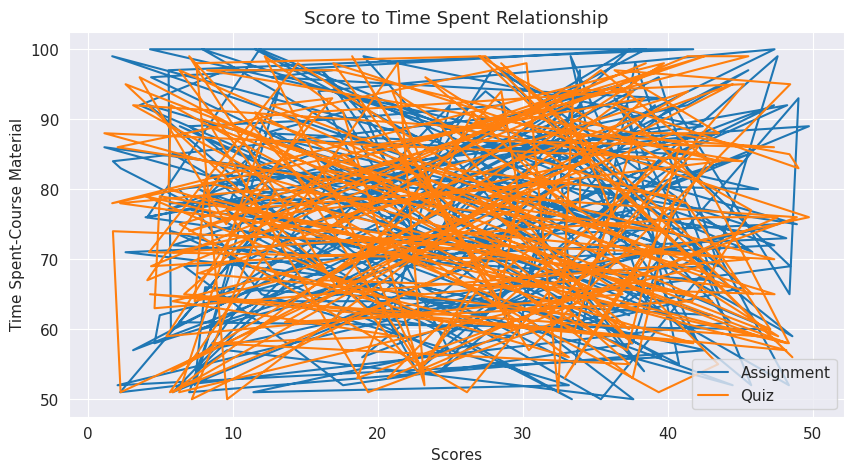

In [ ]:
plt.plot(performance_df["Time Spent on Course Materials (hours)"], performance_df["Assignment Scores"])
plt.plot(performance_df["Time Spent on Course Materials (hours)"], performance_df["Quiz Scores"])

plt.ylabel("Time Spent-Course Material")
plt.xlabel("Scores")

plt.legend(["Assignment", "Quiz"])
plt.title("Score to Time Spent Relationship");

This line plot doesn't seem very informative except for showing to us that the data is very scattered... Let's try other charts, line plot, bar charts.

Now, we have categorized the scores for easier Visualization.

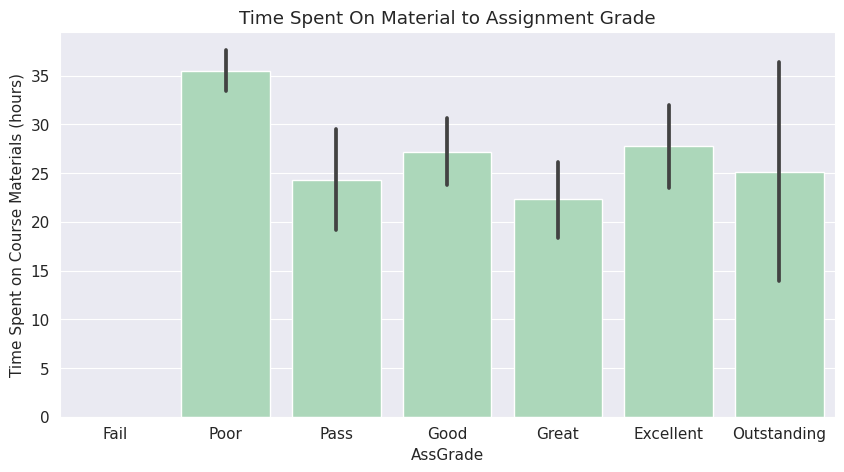

In [ ]:

# A barplot showing Average Time Spent on course material grouped by categorized assignment scores.
sns.barplot(y = performance_df["Time Spent on Course Materials (hours)"],
            x = performance_df["AssGrade"],
            color = (0.647, 0.871, 0.722, 0.89))

plt.title("Time Spent On Material to Assignment Grade");

The barplot shows that:
> students who spent the highest times on course material, have performed quite badly at the assignment aspect of their academics, this is most likely due to much concentration on studying the course material, leaving them with little or no time to do assignments.

> Also it must be noted that for students who have performed outstandingly at assignments, we have those who have spent as high as 35 hours on course material and those who have spent as low as 15hrs.

This figures are outliers as it quite differs from the average `(25hrs)` time spent on course material by students with outstanding assignment grade.

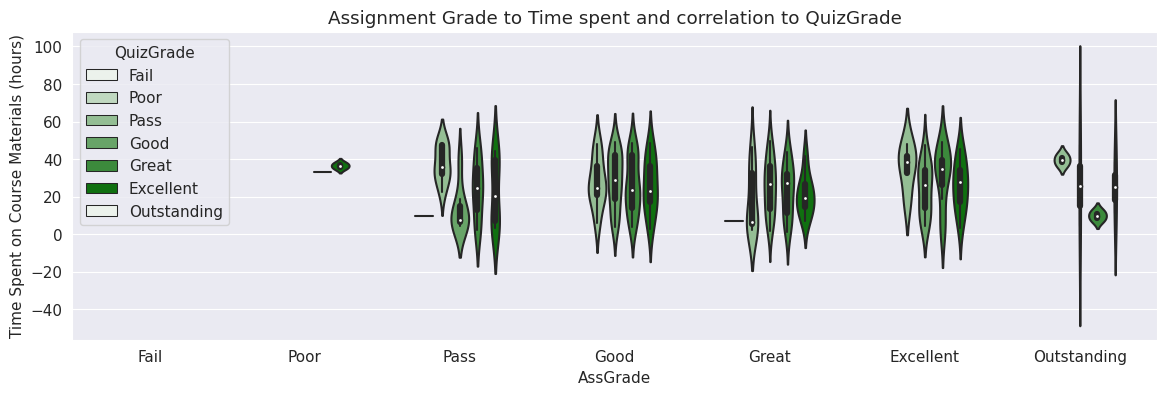

In [ ]:
plt.figure(figsize = (14,4))
color_palette1 = sns.light_palette("Green")
sns.violinplot(x=performance_df["AssGrade"], y=performance_df["Time Spent on Course Materials (hours)"], data = performance_df,
               hue=performance_df["QuizGrade"],
               palette = color_palette1
)

plt.title("Assignment Grade to Time spent and correlation to QuizGrade");

We are looking at how time spent on course material may have affected assignment performance of students. it should be noted that each violin plot represents a group of students and their density along time spent on course material is represented by the width of the violin plot, while the the height shows how disperse this group of students are in time spent.

> It seems obvious that assignment performance does not seem to correlate with quiz performance as we can see excellent quiz grade intersect with poor assignment grade without much  disperity on time spent. which confirms our proposition that students who have invested lot of time into study of course material muct have sacrificed time to do assignments.

> Also, if we look towards the outstanding grade of the assignment, it stands out that it's indicating a poor quiz grade despite an high average Time of 40hrs spent on course material. This really stands out.

> We will only get clearer on the trends as we go on.

Now, we should probably see if this trend is specific to `course names` from certain `course titles`. Let's see a scatter plot of the same data and our hue being the `course titles`

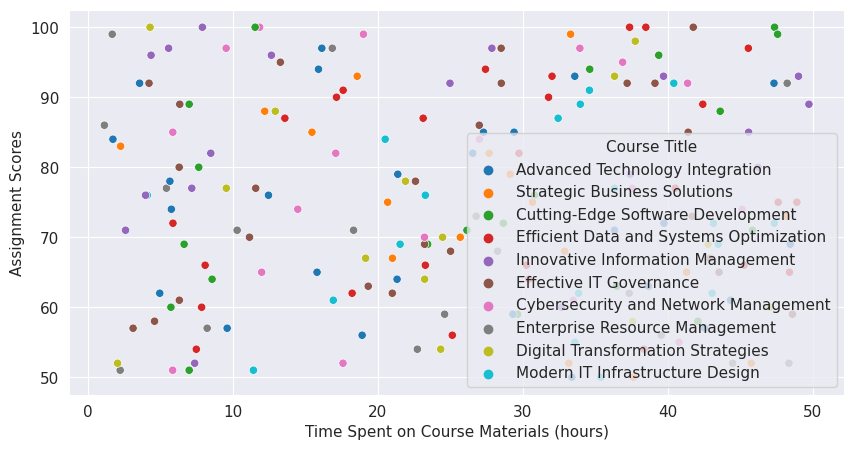

In [ ]:
sns.scatterplot(x = performance_df["Time Spent on Course Materials (hours)"],
y = performance_df["Assignment Scores"],
hue = performance_df["Course Title"]);

###


This plot is not very informative, what can be deduced is.
> Here, it seems that even students whom have spent the lowest time on the course material performed excellently well at their assignment.

> Also, it doesn't seem like the trend in assignment performance is specific to a course as we cannot see an obvious density of one of the hues representing the `course titles`

Let's separate the plot into course titles, and point out the trends as related to course titles.

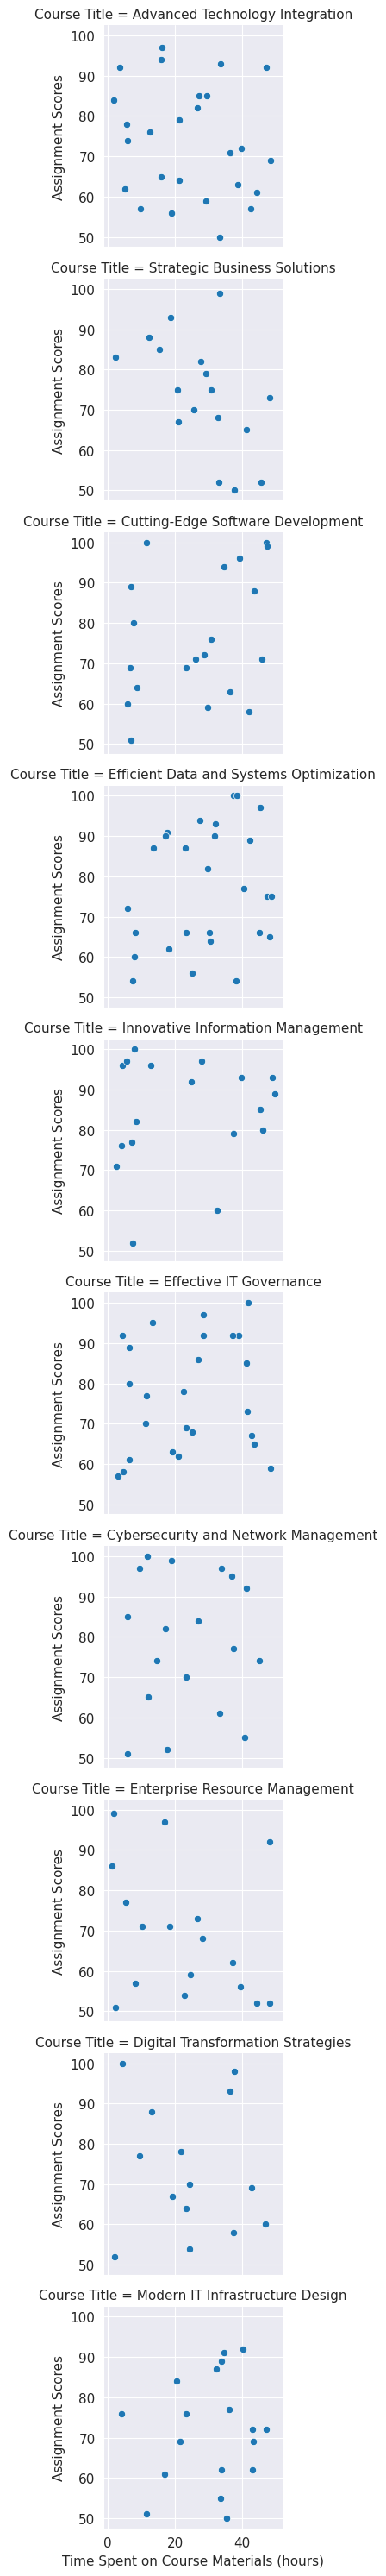

In [ ]:
# Setup a facet grid to separate the course titles apart
g = sns.FacetGrid(data = performance_df,
                  col = 'Course Title',
                  col_wrap = 1)

# Map sns.scatterplot to create separate course title scatter plots
g.map(sns.scatterplot, 'Time Spent on Course Materials (hours)', 'Assignment Scores', alpha = 1)
plt.subplots_adjust(wspace=2.8);

This is much more informative, we can easily see that;
> For the course title `Advanced Technology Integration`, there's not much occurrence of high assignment scores among students that have spent the highest time on course materials.
While among students that haven't spent as much time, we had assignment scores from low to outstanding scores `(100)`.

>For `Strategic Business Solutions`, Studemts who invested much time on course materials have lower assignment scores compared tostudents who spent less time. the relationship is `linear`in this case and the slope is `negative. that is increasing time on course material corresponds to decreasing assignment scores. it;s interesting!

>For `Cutting Edge Software Development`, the relationship is k shaped.

>For `Efficient Data And Systems Optimization`, Students who have have spent little time on course materials seem to be unacble to achieve quite high assignment scores, while for students with medium and high time spent on course material there has been quite much more students with excellent assignment scores.

>For `Inovative Information Management`, Most students irrespective of time spent on course materials have achieved above `70`, except for two of the students.

>For `Effective IT Governance`, Interestingly we have a dog shaped data visualiation. There is no specific pattern. it's of utmost importance to note that only a student with high time spent on course material could obtain a score of `100`!

>`Cybersecurity and NEtwork Management`, there isn't Inference of interest from this. As there isn't relationship between time spent on course material and the assignment scores.

>For `Enterprise Resource Management`, with increase in time spent on course material, students seem to be unable to achieve high assignment scores.

>For `Digital Transformation Strategies`, there is a kind of `ig-ag`up pattern inn the distribution of data points. Starting from the lowest point, we can see an increasing assignment score with increasing time spent, then a reverse was experienced, then another positive then finaly negative slope, ending with `100`score from one of the lowest time spent on course material.

>For `Modern IT Infastructure` there seem to be a positive linear relationship between assignment scores and time spent on course materials. There is also observed to be a random clustering of data points in assignment score range of `50` ~ `75` and time spent between `30` ~ `50`.

So, it would be nice to see the relationship between forum Participation(Graded Forum Likes) and Time spent on course materials.

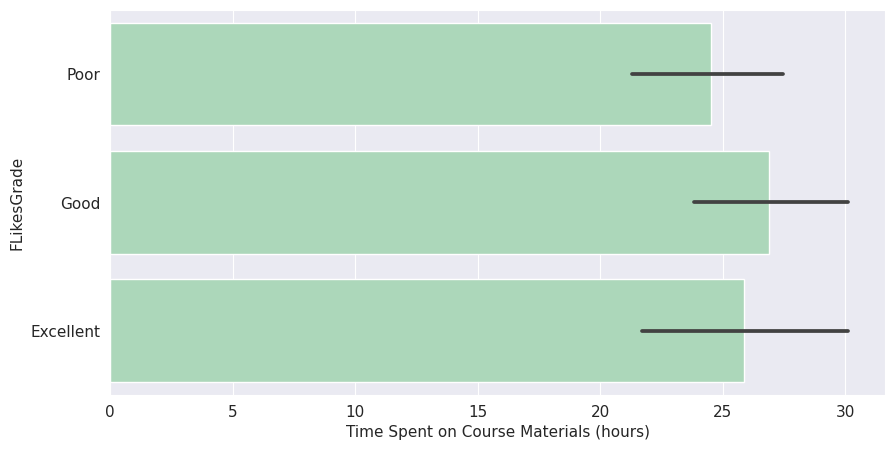

In [ ]:
sns.barplot(y = performance_df['FLikesGrade'],
            x = performance_df["Time Spent on Course Materials (hours)"],
            color = (0.647, 0.871, 0.722, 0.89));

> so, it seems that spending average time on course material compared to other students is helpful to excellent forum likes as you would have contents to give and have time to foster interactions on the comment section, while spending too much time on study may not give a student the time to encourage responses.
while not spending enough time on study may result into the inability of student to produce engaging and valuable contents as regards the course, consequently leading to poor forum likes among such group of students.

Let's be clear on how time spent on course material affect Quiz grades.

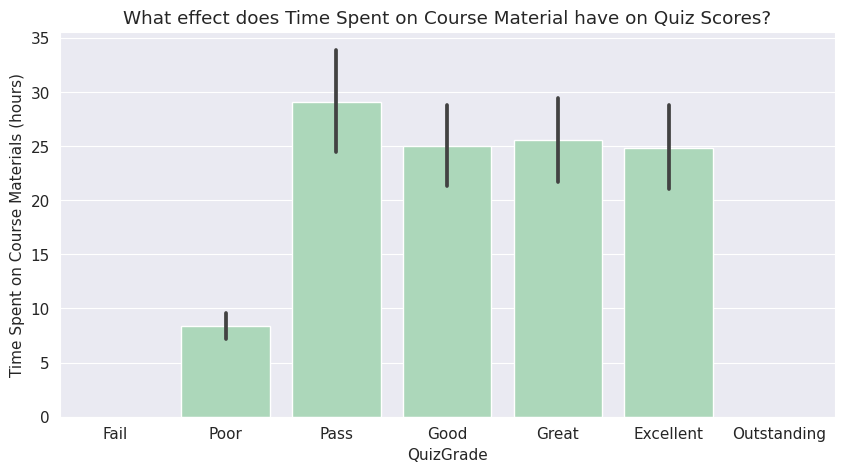

In [ ]:
sns.barplot(x = performance_df['QuizGrade'],
            y = performance_df["Time Spent on Course Materials (hours)"],
            color = (0.647, 0.871, 0.722, 0.89))

plt.title("What effect does Time Spent on Course Material have on Quiz Scores?");

The barplot shows that
> those who have had `poor` Quiz grade have spent between `7-10hrs` on Course material which is `very low`.

> Also The highest average time spent on course material has been revealed to come from students with `pass` quiz grades. We don't know how true that is students can easily give false information on time spent on the course material as a protest to the grade gotten.

> It's important to note that student who have had `excellent` quiz grade has spent between an average of `22-29hrs` on the course material.

**Question 2: Is there a correlation between forum participation and academic performance?**

In [ ]:
performance_mean

,Assignment Scores,Quiz Scores,Forum Posts,Forum Replies,Forum Likes
Course Title,,,,,
Advanced Technology Integration,73.73,76.35,27.04,27.12,22.88
Cutting-Edge Software Development,76.45,74.35,25.50,24.60,31.40
Cybersecurity and Network Management,78.33,80.39,32.17,24.11,27.56
Digital Transformation Strategies,73.43,73.79,24.29,25.29,26.79
Effective IT Governance,77.08,74.24,23.20,26.52,24.68
Efficient Data and Systems Optimization,76.96,79.74,25.41,24.30,25.63
Enterprise Resource Management,69.24,74.47,27.35,24.35,28.88
Innovative Information Management,84.17,75.67,25.00,23.78,28.39
Modern IT Infrastructure Design,71.94,74.33,26.28,27.11,27.06


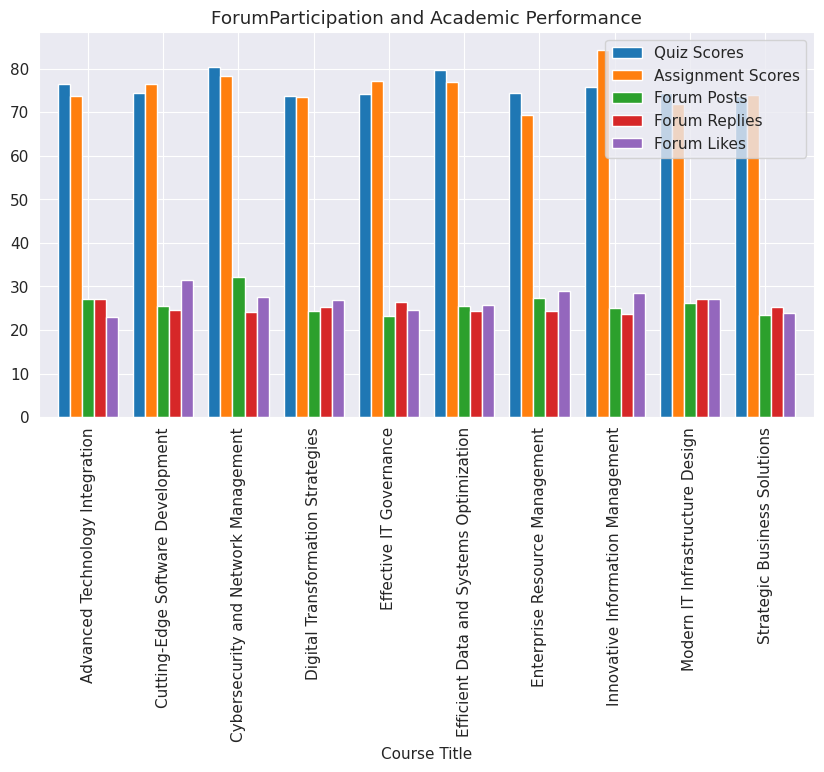

<Figure size 1000x500 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt

performance_mean[['Quiz Scores', 'Assignment Scores','Forum Posts', 'Forum Replies', 'Forum Likes']].plot(kind='bar', width = .8,
                                                                                                          title='ForumParticipation and Academic Performance')
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.figure(figsize=(10,5));

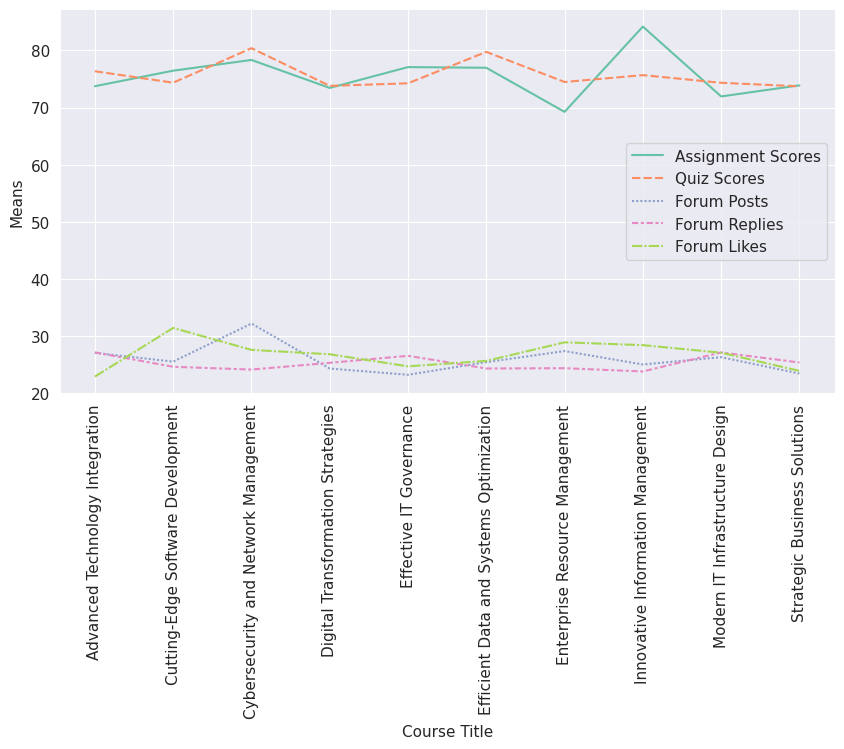

In [ ]:
sns.lineplot(performance_mean,
            palette = "Set2")

plt.xticks(rotation = 90)
plt.ylabel("Means");
#

In [ ]:
plt_styles = plt.style.available
plt_styles

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

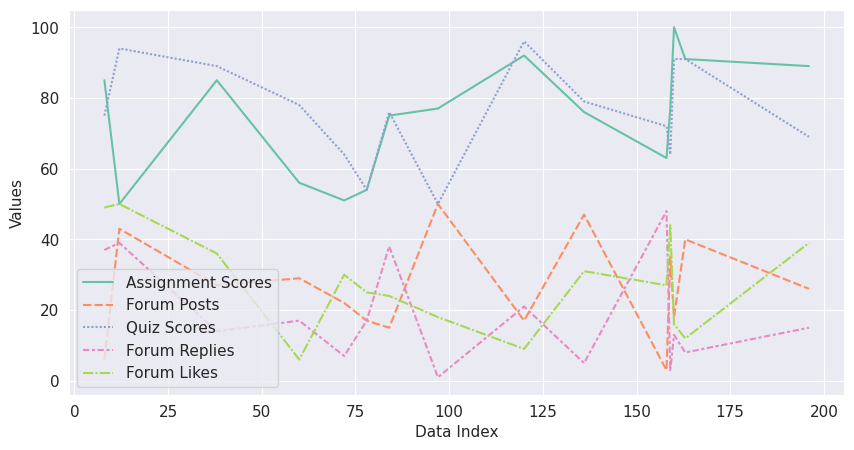

In [ ]:
plt.style.use(plt_styles[13])
sns.lineplot(performance_df[["Course Name", "Assignment Scores", "Forum Posts", "Quiz Scores", "Forum Replies", "Forum Likes"]].sample(15),
            palette = "Set2")

plt.xticks(rotation = 0)
plt.ylabel("Values")
plt.xlabel("Data Index");
#

The above lineplot is a lot informative, let's take some observations from this sample:
> The `Assignment Scores` seem to be in relationship with `Forum Posts` and `Forum Replies`. Trend is increase in one correspond to increase in the others.

> Also, an opposing trend is discovered between `Qui Scores` and `Forum Likes`

> There's an opposing trend between `Forum Likes` and `Forum Posts`.

> `Forum Posts` and `Qui Scores` also trend together.


**Question 3: Are there specific courses where student engagement is particularly high or low?**

In [ ]:
performance_df.head(2)

,Student ID,Course ID,Course Name,Course Start Date,Course End Date,Student Name,Enrollment Date,Course Completion Status,Assignment Scores,Quiz Scores,...,Forum Replies,Forum Likes,Time Spent on Course Materials (hours),Course Title,AssGrade,QuizGrade,FPostsGrade,FRepGrade,FLikesGrade,TimeOnMaterial
0,1,2,Switchable eco-centric archive,2023-07-22,2023-12-12,Michelle Chase,2022-10-14,Completed,71,76,...,39,24,36.33,Advanced Technology Integration,Good,Good,Good,Good,Good,High
1,2,1,Organized contextually-based alliance,2023-07-12,2023-05-18,Adrian Sanders,2022-10-16,Completed,99,90,...,14,12,33.30,Strategic Business Solutions,Excellent,Great,Excellent,Poor,Poor,High


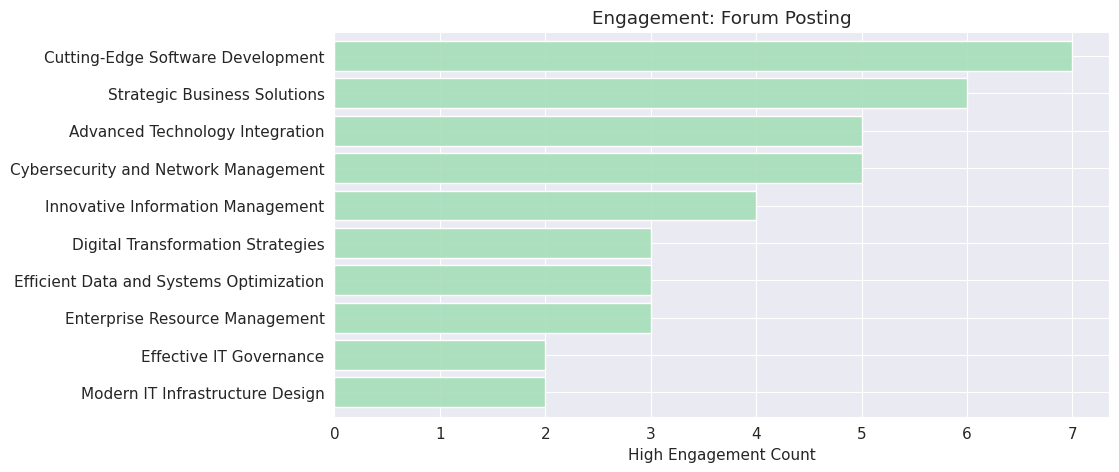

In [ ]:
ForumPosting = performance_df.loc[performance_df['FPostsGrade'] == "Excellent"]["Course Title"].value_counts(ascending = True)
ForumPosting.plot(kind = 'barh', color = (0.647, 0.871, 0.722, 0.89), width = .8)
plt.xlabel("High Engagement Count")
plt.title("Engagement: Forum Posting");

`Cutting Edge Software development` has the highest enggagement in terms of `Forum Posting`. While `Modern IT Infrastructure Design` and `Effective IT Governance` has the lowest engagements.


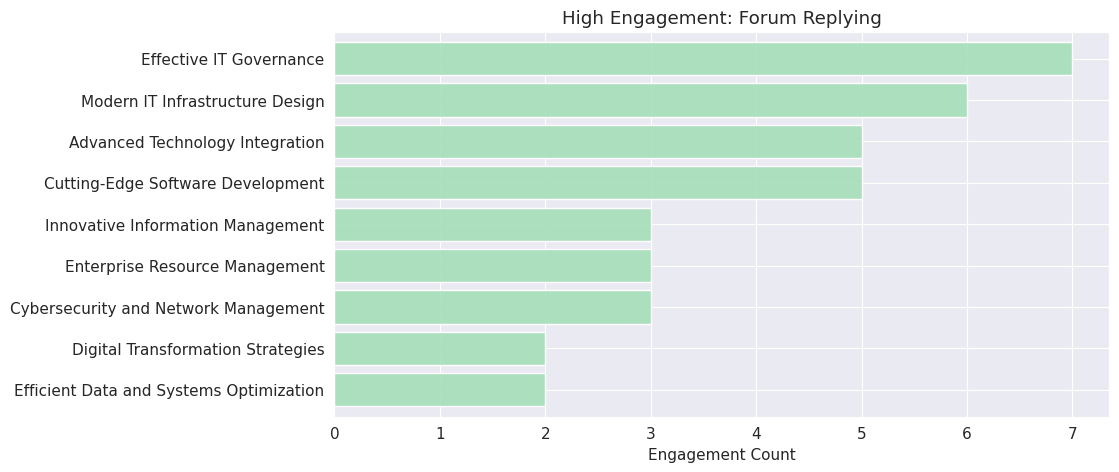

In [ ]:
ForumReplying = performance_df.loc[performance_df['FRepGrade'] == "Excellent"]["Course Title"].value_counts(ascending = True)
ForumReplying.plot(kind = 'barh', color = (0.647, 0.871, 0.722, 0.89), width = .8)
plt.title("High Engagement: Forum Replying")
plt.xlabel("Engagement Count");

`Effective IT Governance` has the highest engagements in terms of `Forum Replying`. While `Digital Transformation Strategies` and `Efficient Data Systems Optimiation` has the lowest engagements.



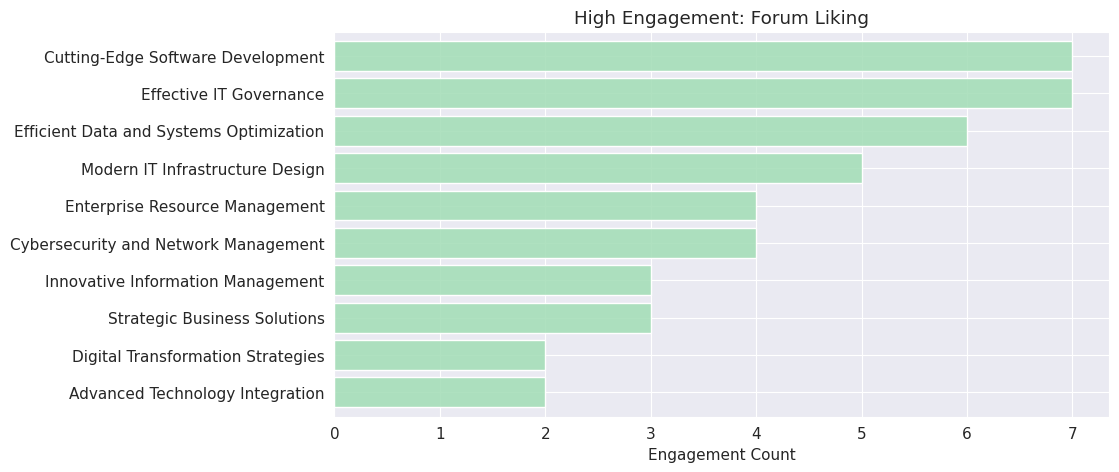

In [ ]:
ForumLiking = performance_df.loc[performance_df['FLikesGrade'] == "Excellent"]["Course Title"].value_counts(ascending = True)
ForumLiking.plot(kind = 'barh', color = (0.647, 0.871, 0.722, 0.89), width = .8)
plt.title("High Engagement: Forum Liking")
plt.xlabel("Engagement Count");

`Cutting-Edge Software Development` and `Effective IT Governance`  has the highest engagements in terms of `Forum Liking`. While `Digital Transformation Strategies` and `Andvaced Technology Integration` has the lowest engagements.

**Generally;** `Cutting-Edge Software Development` and `Effective IT Governance` seem to lead in students engagements, While `Digital Transformation Strategies` seems to be low in engagement.



**More questions:**
- Which categories of students in terms of area of high engagement seem to complete the course.
- Discover the trend in course start date and completion status.

<Axes: xlabel='Course Completion Status', ylabel='Time Spent on Course Materials (hours)'>

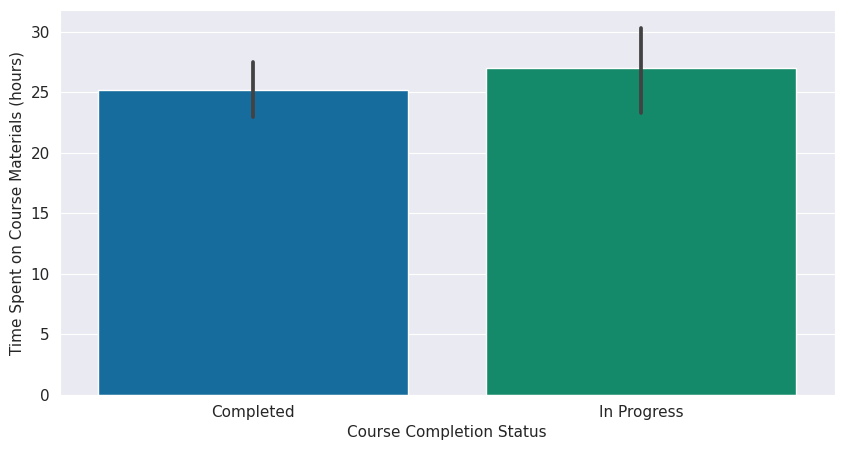

In [ ]:
sns.barplot(y="Time Spent on Course Materials (hours)",
            x="Course Completion Status",
            data = performance_df)

Students who have their courses in progress have spent more time on Course Material compared to students who have their courses completed, on the average.

<Axes: xlabel='Course Start Date', ylabel='Time Spent on Course Materials (hours)'>

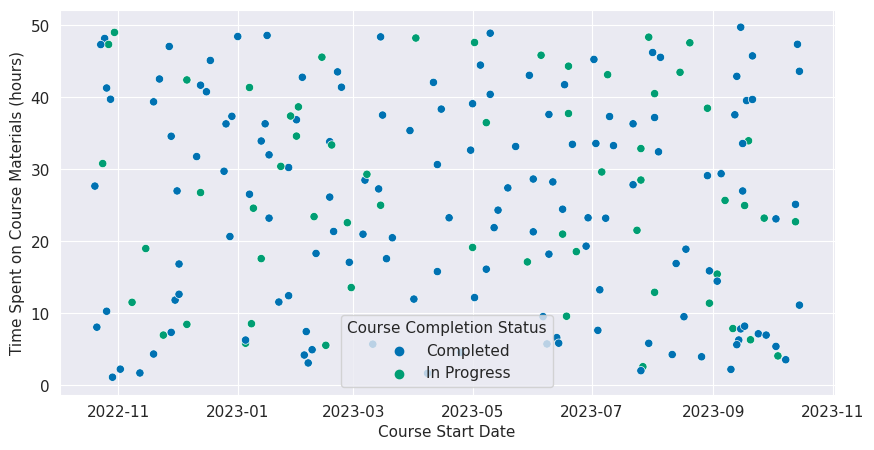

In [ ]:
sns.scatterplot(y="Time Spent on Course Materials (hours)",
                x="Course Start Date",
                data = performance_df,
                hue = "Course Completion Status")

From the scatterplot it is seen that course incompleteness has no relationship with enrollment.

## 4: Highlight Insights Gained and Inferences

#### $ Inferences:
**Enrollment:**

•  Course registration started November 2022 and  ended May 2023.

•  Larger Percentage of enrolled students have completed their respective courses by the time of data pulling.

•  Also, there's only one enrollment on the month of may. The last enrollment recorded



**Course Title:**

•  The most enrolled course Title is the Efficient Data and Systems Optimization, will th 27 enrollments at data pulling. While the course Title with the least enrollment is `Digital Transformation Strategies`, with 14 enrollments.

•  By totalling the academic scores( average of assignment and quiz scores) by the enrollment date, it can be see that the total scores lie in range of columns 2000.

•  The Course title `Innovative Information Systems` has the highest recorded recorded average score of 84.17 from the assignment. while the lowest average score of `69.24` was obtained under the course title `Enterprise Resource Management` for the assignment also. This scores are computed based on course title.

•  The Highest and Lowest Quiz scores Average by Course Titles respectively are `80.39` and `73.71.

•  Attention drawn to Forum Participation, `Cyber Security and Network Management` which had the highest computed average Quiz Scores has the highest average participation value of  32.17 for Forum Posts and the least average Forum participation value is 22.88 Average Forum Likes computed for `Advanced Technology Integration`.

•  Majority of students can be said to have spent a high amount of time on Course Material.

•  students who spent the highest times on course material, have performed quite badly at the assignment aspect of their academics, this is most likely due to much concentration on studying the course material, leaving them with little or no time to do assignments.

Also it must be noted that for students who have performed outstandingly at assignments, we have those who have spent as high as 35 hours on course material and those who have spent as low as 15hrs.

• assignment performance does not seem to correlate with quiz performance as we can see excellent quiz grade intersect with poor assignment grade without much disperity on time spent. which confirms our proposition that students who have invested lot of time into study of course material muct have sacrificed time to do assignments. Also, the trend isn't specific to specific course titles.

•Spending average time on course material compared to other students is helpful to excellent forum likes as you would have contents to give and have time to foster interactions on the comment section, while spending too much time on study may not give a student the time to encourage responses.
while not spending enough time on study may result into the inability of student to produce engaging and valuable contents as regards the course, consequently leading to poor forum likes among such group of students.
•Those who have had poor Quiz grade have spent between 7-10hrs on Course material which is very low.

•Students who have had excellent quiz grade has spent between an average of 22-29hrs on the course material.

•Based on course titles there are more high average Quiz Scores to Assignment scores.

•Those who are In progress with the courses have spent more time on course material ocompared to Students who have completed the courses on the average.

#### $ Recommendations

It's recommended that Students should spend average time on Course Material, in other to have time to carefully do assignment, as well as find time to engage the forum effectively.

## 5: Create and Export Created Datasets as CSVs

In [ ]:
performance_df.sample(20)

,Student ID,Course ID,Course Name,Course Start Date,Course End Date,Student Name,Enrollment Date,Course Completion Status,Assignment Scores,Quiz Scores,...,Forum Replies,Forum Likes,Time Spent on Course Materials (hours),Course Title,AssGrade,QuizGrade,FPostsGrade,FRepGrade,FLikesGrade,TimeOnMaterial
139,140,5,Mandatory attitude-oriented open architecture,2023-01-31,2023-09-30,Adam Evans,2022-10-13,In Progress,94,66,...,20,14,34.62,Cutting-Edge Software Development,Excellent,Good,Excellent,Poor,Poor,High
154,155,10,Public-key background Graphical User Interface,2023-01-05,2024-01-06,Jennifer Cruz,2022-10-16,In Progress,85,51,...,48,22,5.86,Cybersecurity and Network Management,Great,Pass,Good,Excellent,Good,Very Low
187,188,8,Fundamental attitude-oriented moderator,2023-01-15,2023-10-12,Vickie Guerra,2022-10-16,Completed,93,97,...,31,31,36.33,Digital Transformation Strategies,Excellent,Excellent,Poor,Good,Good,High
115,116,2,Polarized mission-critical moderator,2022-11-12,2023-12-31,Terry Wilkinson,2022-10-15,Completed,84,74,...,31,3,1.73,Advanced Technology Integration,Great,Good,Good,Good,Poor,Very Low
17,18,10,Secured web-enabled strategy,2022-12-01,2023-12-28,Leslie White,2022-10-16,Completed,84,99,...,48,46,27.01,Cybersecurity and Network Management,Great,Excellent,Excellent,Excellent,Excellent,High
18,19,1,Adaptive empowering open system,2023-09-21,2024-01-09,Kayla Diaz,2022-10-15,Completed,52,77,...,13,19,45.76,Strategic Business Solutions,Pass,Great,Poor,Poor,Poor,Very High
113,114,2,Proactive multimedia monitoring,2023-02-18,2023-10-15,Christopher Navarro,2022-10-11,In Progress,50,81,...,27,20,33.39,Advanced Technology Integration,Poor,Great,Good,Good,Poor,High
119,120,10,Polarized full-range toolset,2023-08-17,2023-12-08,Theresa Owen,2022-10-15,Completed,97,75,...,26,27,9.54,Cybersecurity and Network Management,Excellent,Good,Good,Good,Good,Very Low
148,149,3,Decentralized full-range secured line,2023-07-22,2024-01-14,Morgan Nichols,2022-10-12,Completed,97,67,...,26,18,27.87,Innovative Information Management,Excellent,Good,Poor,Good,Poor,High
142,143,9,Multi-channeled zero administration matrices,2023-04-25,2023-07-19,Catherine Kim,2022-10-11,Completed,58,63,...,25,16,4.60,Effective IT Governance,Pass,Good,Good,Good,Poor,Very Low


In [ ]:
performance_df.to_csv("Peak Students Performsnce.csv",
                      index = None,
                      header = True)

## 6: Create a Dashboard with Google Sheet

Dashboard link: https://docs.google.com/spreadsheets/d/1BsOj2cFYnRh0l88KWyxxA64hVzyJmsXI45Uvj7zAHkY/edit?usp=drivesdk
                                           